<a href="https://colab.research.google.com/github/mmonem1996/California-Housing-Price-Estimation/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Objective:** This analysis aims to test the performance of several linear regression models on california housing data to estimate houses prices.

**California Housing Data:** This is a sample data available on Google Colab IPython engine. the data contains information on households in California ( houses main characteristic, median family income and house median value). The target variable in this analysis will be *median_house_value* whereas all other columns will be regarded as features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Data Pre-processing

All of features are of type float. Therefore, we don't need to encode any feature into numerical data. However, we will check if skewness is present

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3cb6667d0>,
      dtype=object)

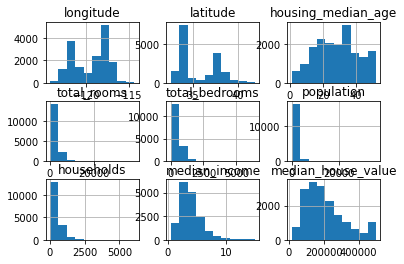

In [ ]:
data.hist()

we have 5 columns which show skewed distribution. so *np.log1p* transformation will be used

In [ ]:
skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for col in skewed_cols:
  data[col] = np.log1p(data[col])
  test_data[col] = np.log1p(test_data[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3c73d2b90>,
      dtype=object)

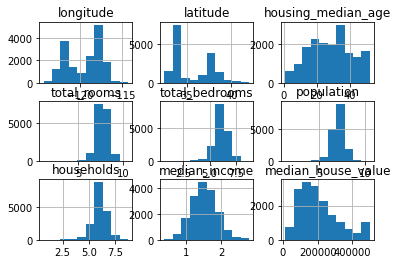

In [ ]:
data.hist()

In [ ]:
X = data.drop('median_house_value', axis=1)
Xtest  = test_data.drop('median_house_value', axis=1)

y = data['median_house_value']
ytest = test_data['median_house_value']

# Machine Learning Models Analysis

In [ ]:
# this dict will contain the results of all models
analysis_results = {}

## Standard Linear Regression

In [ ]:
kf = KFold(n_splits=3, shuffle=True)

In [ ]:
lr = LinearRegression()

In [ ]:
y_pred = cross_val_predict(lr, X ,y,cv= kf)
rmse_ = np.round(rmse(y, y_pred ))
score = r2_score(y , y_pred)
print("Root mean squared error (Training) = {0:,}".format(rmse_))
print("R2 Score (Training) = {:0.2f}".format(score))
analysis_results['Linear Regression'] = [score, rmse_]

Root mean squared error (Training) = 69,645.0
R2 Score (Training) = 0.64


## Linear Regression With Polynomial features

We can see from below when adding new features using PolynomialsFeatures, the model performed much worse than the standard linear regression. This suggests that the drop in accuracy is probably due to high variance.

We will test the data against Ridge and Lasso Regression models to find the best regularized model

In [ ]:
prf = PolynomialFeatures(degree=4)
X_poly = prf.fit_transform(X)
lrp = LinearRegression()

In [ ]:
y_pred = cross_val_predict(lrp, X_poly , y, cv=kf)
rmse_ = np.round(rmse(y, y_pred ))
score = r2_score(y , y_pred)
print("Root mean squared error (Training) = {0:,}".format(rmse_))
print("R2 Score (Training) = {:0.2f}".format(score))
analysis_results['Linear Regression (Polynomial Features)'] = [score, rmse_]

Root mean squared error (Training) = 104,703.0
R2 Score (Training) = 0.19


## Ridge Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')
np.set_printoptions(precision=3)

In [ ]:
alphas = np.geomspace(0.05, 1, 30)
print('Ridge Regression Cross validation results')
alphas_scores = []
for alpha in alphas:
  steps = [('Polynomial Features', PolynomialFeatures(degree=4)), 
         ('Standard Scalar', StandardScaler()),
         ('Ridge', Ridge(alpha=alpha))]
  ppr = Pipeline(steps)
  ypred = cross_val_predict(ppr, X, y, cv=kf)
  score = r2_score(y , ypred)
  alphas_scores.append((alpha, score))
  result = (alpha, np.round(rmse(y, ypred )), score)
  print('For alpha = {}\tRMSE = {:,}\t R2 Score = {:0.2f}'.format(*result))
# print('Regression Results')
# print("Root mean squared error (Testing) = {0:,}".format(np.round(rmse(ytest, ytest_pred ))))
# print("R2 Score (Testing) = {:0.2f}".format(r2_score(ytest , ytest_pred)))

Ridge Regression Cross validation results
For alpha = 0.1	RMSE = 58,704.0	 R2 Score = 0.74
For alpha = 0.11088252403758786	RMSE = 59,013.0	 R2 Score = 0.74
For alpha = 0.12294934136946249	RMSE = 58,997.0	 R2 Score = 0.74
For alpha = 0.1363293329980502	RMSE = 59,074.0	 R2 Score = 0.74
For alpha = 0.1511654054318462	RMSE = 59,540.0	 R2 Score = 0.74
For alpha = 0.167616017014484	RMSE = 58,989.0	 R2 Score = 0.74
For alpha = 0.18585687035693257	RMSE = 58,962.0	 R2 Score = 0.74
For alpha = 0.2060827889490342	RMSE = 59,203.0	 R2 Score = 0.74
For alpha = 0.22850979799374438	RMSE = 59,118.0	 R2 Score = 0.74
For alpha = 0.253377431688657	RMSE = 59,012.0	 R2 Score = 0.74
For alpha = 0.2809512915979979	RMSE = 59,016.0	 R2 Score = 0.74
For alpha = 0.3115258834400635	RMSE = 59,238.0	 R2 Score = 0.74
For alpha = 0.34542776258873636	RMSE = 59,159.0	 R2 Score = 0.74
For alpha = 0.3830190218849575	RMSE = 59,283.0	 R2 Score = 0.74
For alpha = 0.4247011590101219	RMSE = 59,600.0	 R2 Score = 0.74
For alpha 

In [ ]:
# Best Ridge model
steps = [('Polynomial Features', PolynomialFeatures(degree=4)), 
         ('Standard Scalar', StandardScaler()),
         ('Ridge', Ridge(alpha=0.1856))]

ppr = Pipeline(steps)
y_pred = cross_val_predict(ppr, X, y, cv=kf)
rmse_ = np.round(rmse(y, y_pred ))
score = r2_score(y , y_pred)
print("Root mean squared error (Training) = {0:,}".format(rmse_))
print("R2 Score (Training) = {:0.2f}".format(score))
analysis_results['Ridge Regression'] = [score, rmse_]

Root mean squared error (Training) = 58,998.0
R2 Score (Training) = 0.74


In [ ]:
analysis_results

{'Linear Regression': [0.6394129048489874, 69645.0],
 'Linear Regression (Polynomial Features)': [0.18501414965528895, 104703.0],
 'Ridge Regression': [0.7412368522748851, 58998.0]}

## Lasso Regression

In [ ]:
alphas = np.geomspace(0.1, 2, 30)
print('Lasso Regression Cross validation results')
alphas_scores = []
for alpha in alphas:
  steps = [('Polynomial Features', PolynomialFeatures(degree=4)), 
         ('Standard Scalar', StandardScaler()),
         ('Lasso', Lasso(alpha=alpha))]
  ppl = Pipeline(steps)
  ypred = cross_val_predict(ppl, X, y, cv=kf)
  score = r2_score(y , ypred)
  alphas_scores.append((alpha, score))
  result = (alpha, np.round(rmse(y, ypred )), score)
  print('For alpha = {}\tRMSE = {:,}\t R2 Score = {:0.2f}'.format(*result))

Lasso Regression Cross validation results
For alpha = 0.1	RMSE = 60,977.0	 R2 Score = 0.72
For alpha = 0.11088252403758786	RMSE = 60,807.0	 R2 Score = 0.73
For alpha = 0.12294934136946249	RMSE = 60,900.0	 R2 Score = 0.72
For alpha = 0.1363293329980502	RMSE = 60,807.0	 R2 Score = 0.73
For alpha = 0.1511654054318462	RMSE = 60,979.0	 R2 Score = 0.72
For alpha = 0.167616017014484	RMSE = 60,892.0	 R2 Score = 0.72
For alpha = 0.18585687035693257	RMSE = 61,020.0	 R2 Score = 0.72
For alpha = 0.2060827889490342	RMSE = 60,934.0	 R2 Score = 0.72
For alpha = 0.22850979799374438	RMSE = 61,298.0	 R2 Score = 0.72
For alpha = 0.253377431688657	RMSE = 61,350.0	 R2 Score = 0.72
For alpha = 0.2809512915979979	RMSE = 61,069.0	 R2 Score = 0.72
For alpha = 0.3115258834400635	RMSE = 61,021.0	 R2 Score = 0.72
For alpha = 0.34542776258873636	RMSE = 61,043.0	 R2 Score = 0.72
For alpha = 0.3830190218849575	RMSE = 60,896.0	 R2 Score = 0.72
For alpha = 0.4247011590101219	RMSE = 60,891.0	 R2 Score = 0.72
For alpha 

In [ ]:
# Best Lasso model
steps = [('Polynomial Features', PolynomialFeatures(degree=4)), 
         ('Standard Scalar', StandardScaler()),
         ('Lasso', Lasso(alpha=0.1363))]

ppl = Pipeline(steps)
y_pred = cross_val_predict(ppl, X, y, cv=kf)
rmse_ = np.round(rmse(y, y_pred ))
score = r2_score(y , y_pred)
print("Root mean squared error (Training) = {0:,}".format(rmse_))
print("R2 Score (Training) = {:0.2f}".format(score))
analysis_results['Lasso Regression'] = [score, rmse_]

Root mean squared error (Training) = 61,009.0
R2 Score (Training) = 0.72


## Best Model (Ridge with alpha value of 0.1856)

In [ ]:
steps = [('Polynomial Features', PolynomialFeatures(degree=4)), 
         ('Standard Scalar', StandardScaler()),
         ('Ridge', Ridge(alpha=0.1856))]
ppb = Pipeline(steps)
ppb.fit(X, y)
ppb.score(X, y)

0.7544979102462047

In [ ]:
ppb.score(Xtest, ytest)

0.724286445791291

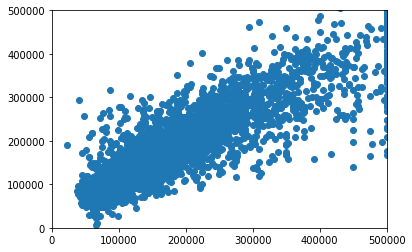

In [ ]:
yp = ppb.predict(Xtest)

plt.xlim((0, 500000))
plt.ylim((0, 500000))
plt.scatter(ytest, yp)

# Summary
Overall, Since the best regression accuracy score found after the above analysis is between 70-75%, I would say that in order to improve the regression accuracy, we should find more information regarding the houses of california.

In [ ]:
analysis_results
Summary = pd.DataFrame(analysis_results).transpose()
Summary.rename({0: 'R2 Score', 1: 'RMSE'}, axis=1, inplace=True)
Summary

,R2 Score,RMSE
Linear Regression,0.639413,69645.0
Ridge Regression,0.741237,58998.0
Linear Regression (Polynomial Features),0.185014,104703.0
Lasso Regression,0.723293,61009.0
